# Predict Future Sale - Comprehensive EDA
## Final project for "How to win a data science competition" Coursera course
https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data  
>Student: Rafael Caneiro de Oliveira  
>Email: rafael.caneiro@gmail.com  
>Date: 05/08/2020

## Load the data

In [1]:
import numpy as np
import pandas as pd

from pathlib import Path

PATH = Path.cwd().parent
DATA_PATH = Path(PATH, "./data/raw/") 

In [2]:
# Load CSV's
sales_train_df = pd.read_csv(Path(DATA_PATH, "sales_train.csv"))
sales_test_df = pd.read_csv(Path(DATA_PATH, "test.csv"))
items_df = pd.read_csv(Path(DATA_PATH, "items.csv"))
item_categories_df = pd.read_csv(Path(DATA_PATH, "item_categories.csv"))
shops_df = pd.read_csv(Path(DATA_PATH, "shops.csv"))

# The correct date parsing
sales_train_df["date"] = pd.to_datetime(sales_train_df["date"],
                                        format="%d.%m.%Y")

# Merge item, category and shop information
train_df = pd.merge(sales_train_df, items_df, on="item_id")
train_df = pd.merge(train_df, item_categories_df, on="item_category_id")
train_df = pd.merge(train_df, shops_df, on="shop_id")
print("train rows before: ", sales_train_df.shape[0])
print("train rows after:  ", train_df.shape[0])
print()
train_df.head()

train rows before:  2935849
train rows after:   2935849



,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-01-02,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,2013-04-26,3,59,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
2,2013-06-26,5,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
3,2013-07-20,6,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
4,2013-09-14,8,59,944,299.0,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""


In [3]:
# Prepare test set for use
test_df = pd.merge(sales_test_df, items_df[["item_id", "item_category_id"]], on="item_id")
test_df["date_block_num"] = 34
print("test rows before: ", sales_test_df.shape[0])
print("test rows after:  ", test_df.shape[0])
test_df.head()

test rows before:  214200
test rows after:   214200


,ID,shop_id,item_id,item_category_id,date_block_num
0,0,5,5037,19,34
1,5100,4,5037,19,34
2,10200,6,5037,19,34
3,15300,3,5037,19,34
4,20400,2,5037,19,34


## Train EDA

### Size and Stats

In [55]:
print(train_df.shape)

(2935849, 17)


In [47]:
# Let`s create some basic date feature eng for the eda
train_df["day"] = train_df.date.dt.day
train_df["week_day"] = train_df.date.dt.dayofweek
train_df["month"] = train_df.date.dt.month
train_df["quarter"] = train_df.date.dt.quarter
train_df["year"] = train_df.date.dt.year
train_df["period"] = train_df.date.dt.to_period("M")

train_df.head().T

,0,1,2,3,4
date,2013-01-02 00:00:00,2013-04-26 00:00:00,2013-06-26 00:00:00,2013-07-20 00:00:00,2013-09-14 00:00:00
date_block_num,0,3,5,6,8
shop_id,59,59,59,59,59
item_id,22154,944,944,944,944
item_price,999,150,199.5,199.5,299
item_cnt_day,1,1,1,1,2
item_name,ЯВЛЕНИЕ 2012 (BD),2012 (BD),2012 (BD),2012 (BD),2012 (BD)
item_category_id,37,37,37,37,37
item_category_name,Кино - Blu-Ray,Кино - Blu-Ray,Кино - Blu-Ray,Кино - Blu-Ray,Кино - Blu-Ray
shop_name,"Ярославль ТЦ ""Альтаир""","Ярославль ТЦ ""Альтаир""","Ярославль ТЦ ""Альтаир""","Ярославль ТЦ ""Альтаир""","Ярославль ТЦ ""Альтаир"""


In [56]:
train_df.describe(include="all").T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
date,2935849,1034,2013-12-28 00:00:00,9434,2013-01-01,2015-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_block_num,2.93585e+06,NaN,NaN,NaN,NaT,NaT,14.5699,9.42299,0,7,14,23,33
shop_id,2.93585e+06,NaN,NaN,NaN,NaT,NaT,33.0017,16.227,0,22,31,47,59
item_id,2.93585e+06,NaN,NaN,NaN,NaT,NaT,10197.2,6324.3,0,4476,9343,15684,22169
item_price,2.93585e+06,NaN,NaN,NaN,NaT,NaT,890.853,1729.8,-1,249,399,999,307980
item_cnt_day,2.93585e+06,NaN,NaN,NaN,NaT,NaT,1.24264,2.61883,-22,1,1,1,2169
item_name,2935849,21807,Фирменный пакет майка 1С Интерес белый (34*42)...,31340,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_category_id,2.93585e+06,NaN,NaN,NaN,NaT,NaT,40.0014,17.1008,0,28,40,55,83
item_category_name,2935849,84,Кино - DVD,564652,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shop_name,2935849,60,"Москва ТЦ ""Семеновский""",235636,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1.0      2629372
2.0       194201
3.0        47350
4.0        19685
5.0        10474
          ...   
179.0          1
187.0          1
194.0          1
195.0          1
508.0          1
Name: item_cnt_day, Length: 198, dtype: int64

In [50]:
train_df.period.sort_values().unique()

<PeriodArray>
['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07',
 '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02',
 '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09',
 '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04',
 '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10']
Length: 34, dtype: period[M]

In [6]:
# Let`s identify the outliers so we can see some graphs without it
cols = ["item_price", "item_cnt_day"]
for col in cols:
    upperbound = np.percentile(train_df[col], 99)
    train_df.loc[train_df[col] > upperbound, "is_outlier"] = 1
    
train_df.is_outlier.fillna(0, inplace=True)

train_df.is_outlier.value_counts()

0.0    2880104
1.0      55745
Name: is_outlier, dtype: int64

### Univariate 
`item_cnt_day`

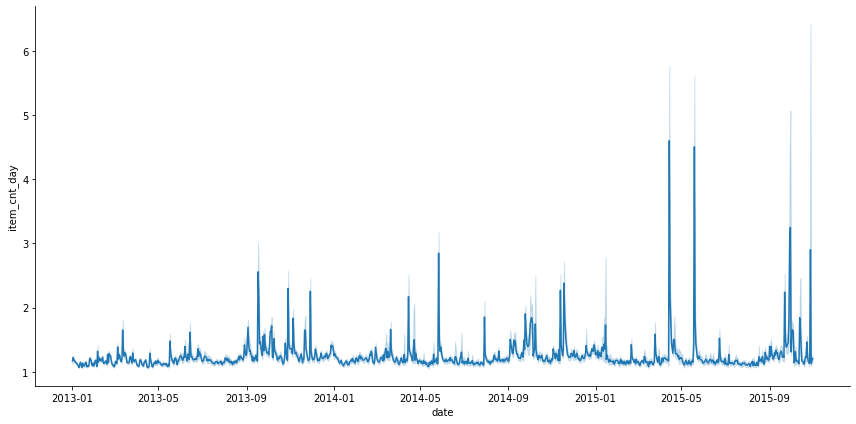

In [13]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

# plt.figure(figsize=(10,5))
g = sns.relplot(x="date",
                y="item_cnt_day",
                kind="line",
                data=train_df,
                height=6,
                aspect=2,
                estimator="mean")

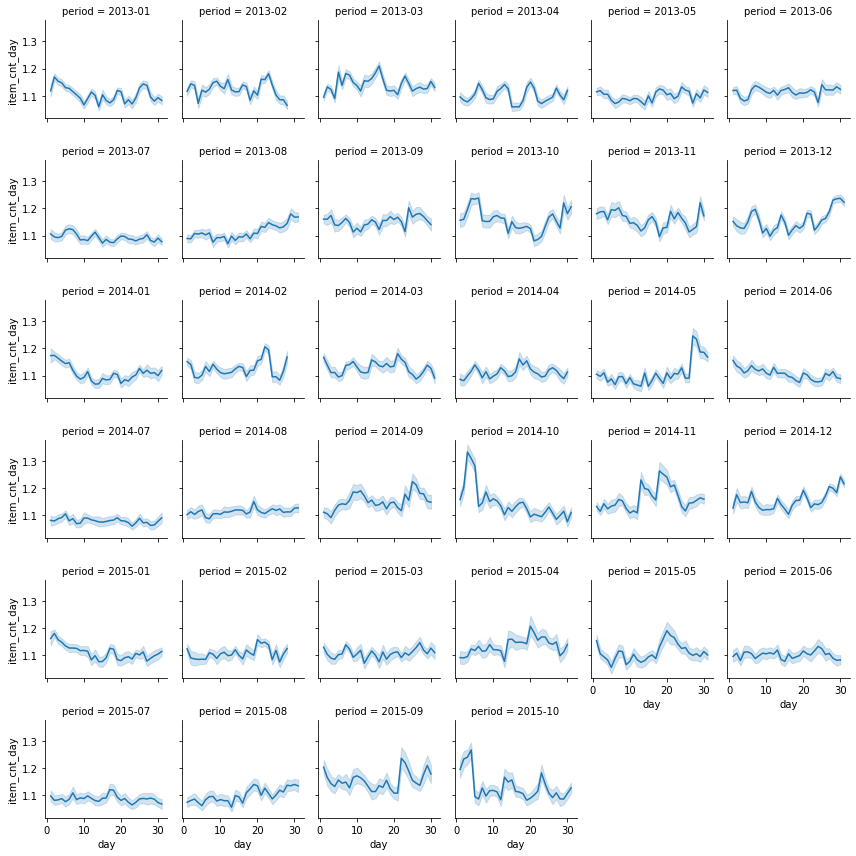

In [51]:
g = sns.relplot(x="day",
                y="item_cnt_day",
                kind="line",
                data=train_df.query("is_outlier == 0"),
                col="period",
                col_order=train_df.period.sort_values().unique(),
                col_wrap=6,
                height=2,
                aspect=1,
                estimator="mean")

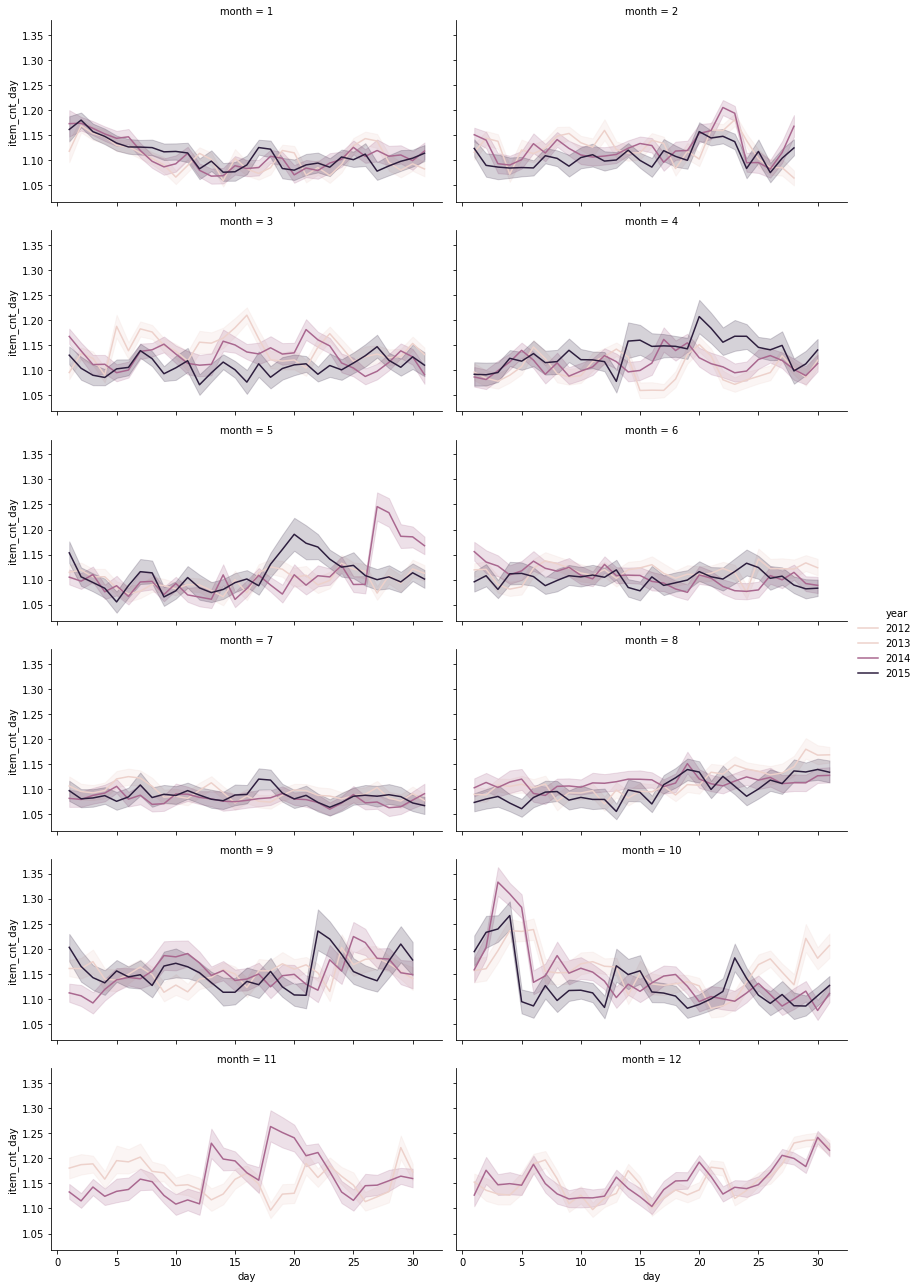

In [54]:
g = sns.relplot(x="day",
                y="item_cnt_day",
                kind="line",
                hue="year",
                data=train_df.query("is_outlier == 0"),
                col="month",
                col_wrap=2,
                height=3,
                aspect=2,
                estimator="mean")

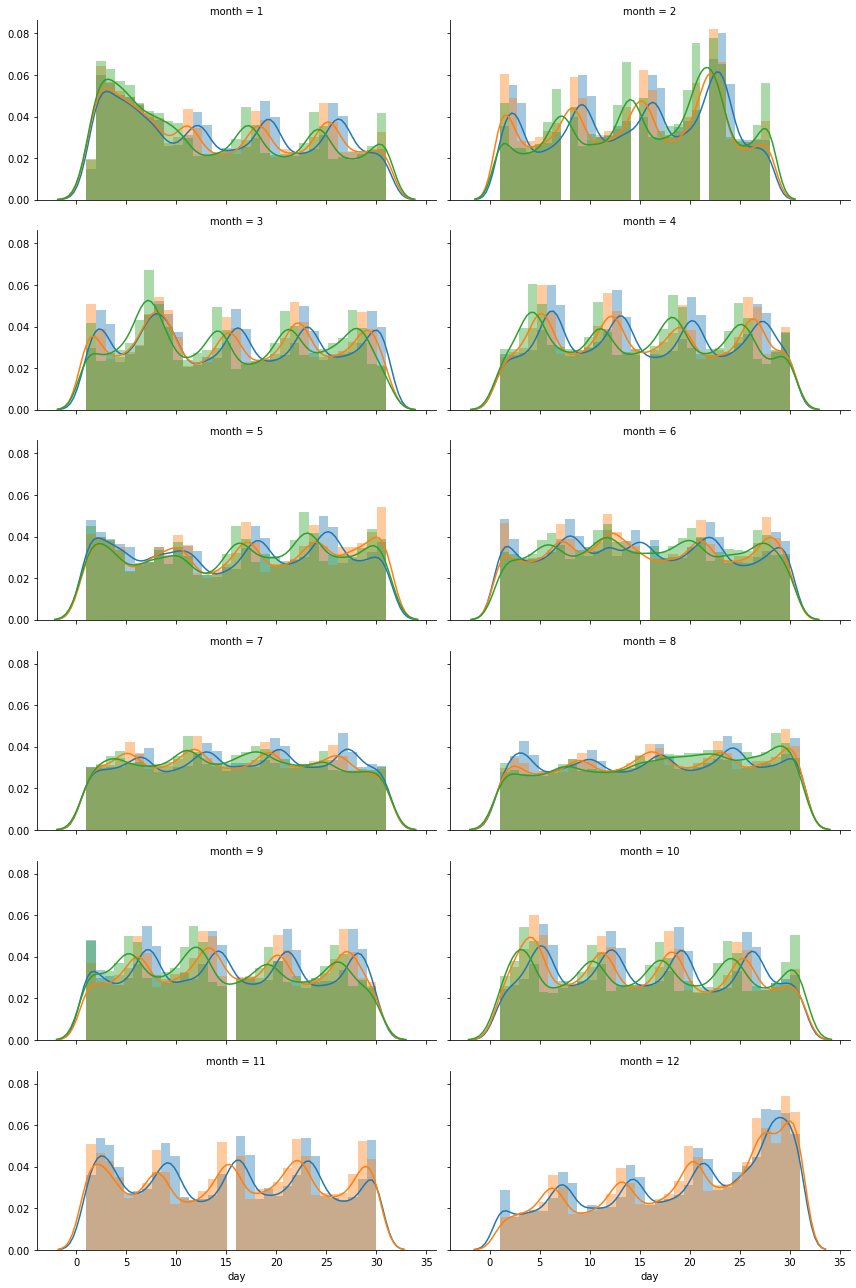

In [65]:
g = sns.FacetGrid(data=train_df.query("is_outlier == 0"),
                  col="month",
                  hue="year",
                  col_wrap=2, 
                  sharex=True, 
                  sharey=True, 
                  height=3,
                  aspect=2)

p = g.map(sns.distplot, "day", bins=31)

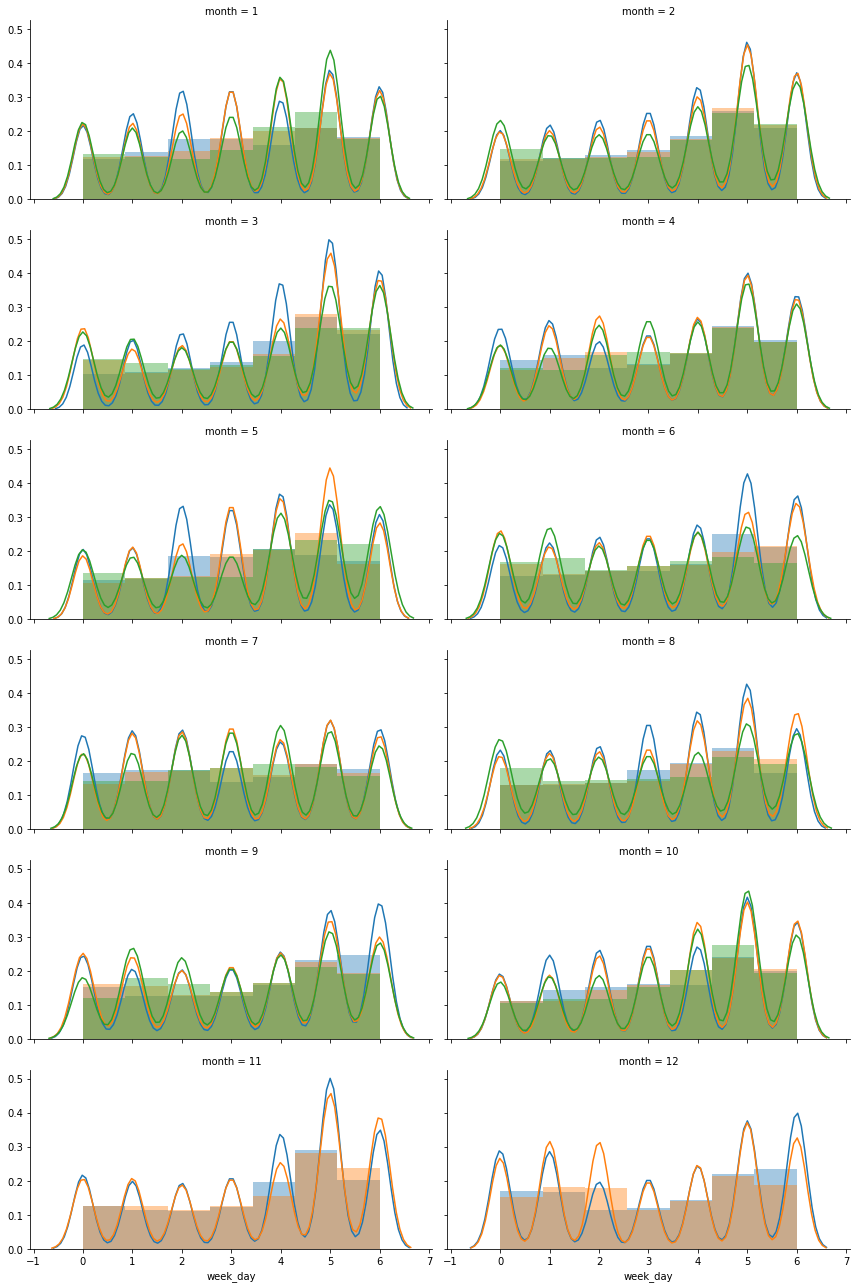

In [80]:
g = sns.FacetGrid(data=train_df.query("is_outlier == 0"),
                  col="month",
                  hue="year",
                  col_wrap=2, 
                  sharex=True, 
                  sharey=True, 
                  height=3,
                  aspect=2)

p = g.map(sns.distplot, "week_day", bins=7)

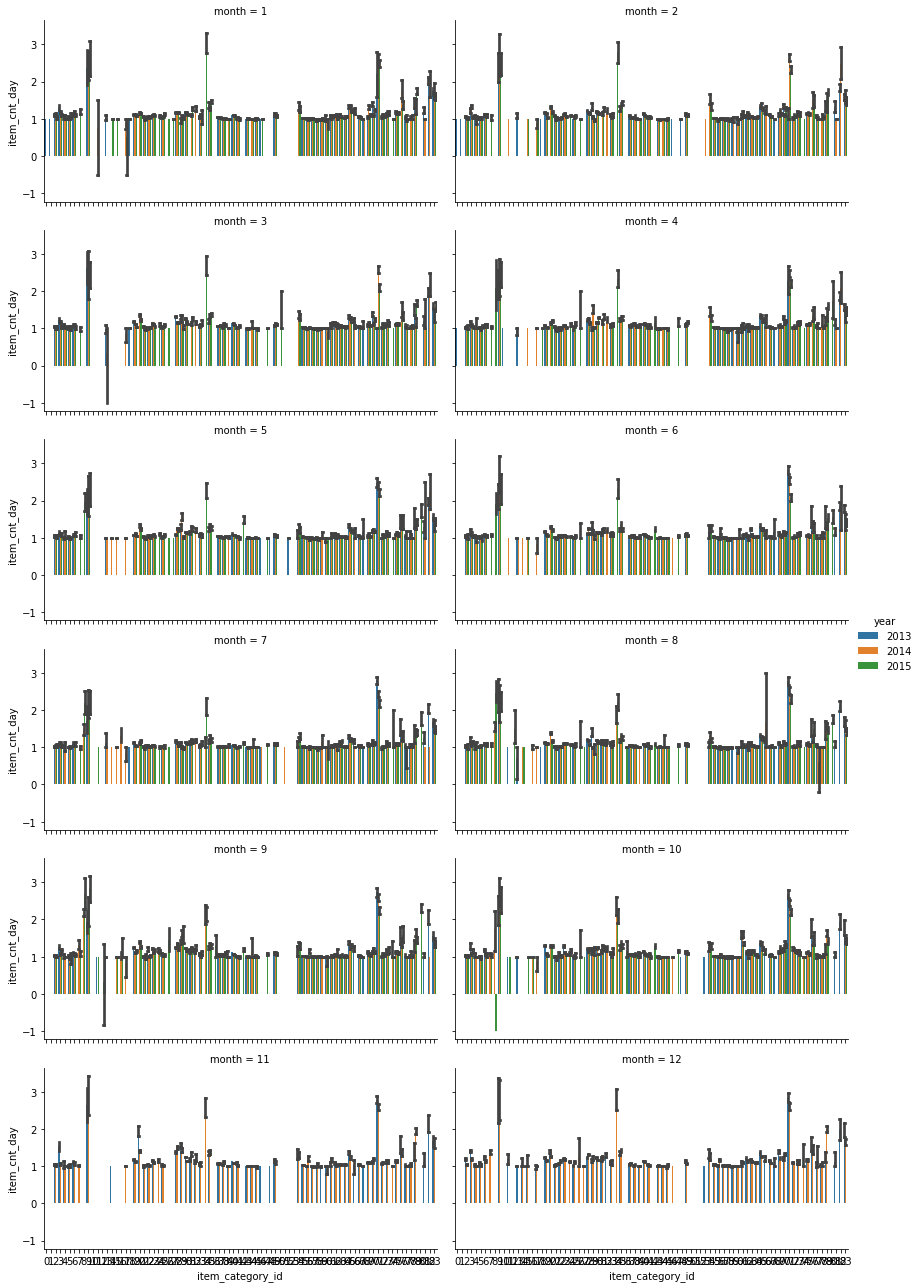

In [87]:
g = sns.catplot(x="item_category_id",
                y="item_cnt_day",
                kind="bar",
                hue="year",
                data=train_df.query("is_outlier == 0"),
                col="month",
                col_wrap=2,
                height=3,
                aspect=2,
                capsize=0.2)

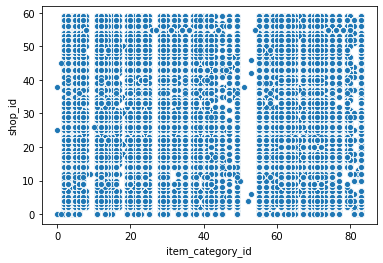

In [90]:
g = sns.scatterplot(x="item_category_id",
                    y="shop_id",
                    data=train_df)

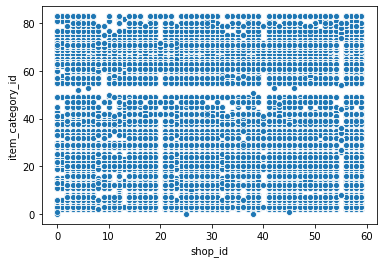

In [91]:
g = sns.scatterplot(y="item_category_id",
                    x="shop_id",
                    data=train_df)

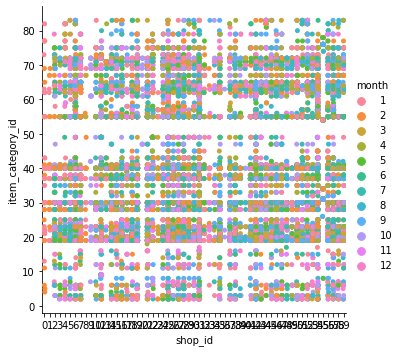

In [98]:
g = sns.catplot(x="shop_id",
                y="item_category_id",
                hue="month",
                data=train_df.sample(frac=0.01))

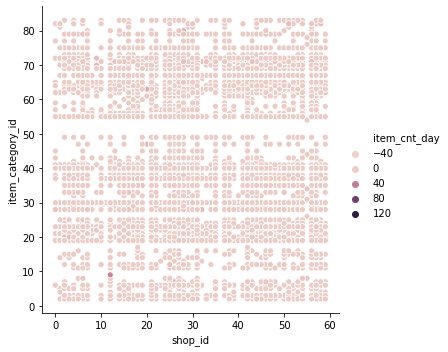

In [99]:
g = sns.relplot(x="shop_id",
                y="item_category_id",
                hue="item_cnt_day",
                data=train_df.sample(frac=0.01))

In [ ]:
# plt.figure(figsize=(10,5))
sns.relplot(x="item_id", y="item_cnt_day", kind="scatter", data=train_df,
            height=6, aspect=2, estimator=None)

- investigar valor -1 em `item_price`
- nlp com dados dos nomes dos produtos e categorias >> Russion Word2Vec

## Outliers
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [ ]:
cols = ["item_price", "item_cnt_day"]
for col in cols:
    upperbound = np.percentile(train_df[col], 99)
    train_df.loc[train_df[col] > upperbound, "is_outlier"] = 1
    
train_df.is_outlier.fillna(0, inplace=True)

train_df.is_outlier.value_counts()

train_df = train_df[train_df.is_outlier==0]

## Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42,
                           n_estimators=20,
                           verbose=2,
                           n_jobs=-1)

features = ["date_block_num", "shop_id",
            "item_id", "item_category_id"]

X_train = train_df[features]
y_train = train_df["item_cnt_day"]

mdl = rf.fit(X_train, y_train)

## Evaluation

In [ ]:
predictions = mdl.predict(test_df[features])

predictions_s = pd.Series(np.round(predictions,0), name="item_cnt_month")

submission = pd.concat([test_df, predictions_s],
                       axis=1)

submission.head()

In [ ]:
submission[["ID", "item_cnt_month"]].to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c competitive-data-science-predict-future-sales -f submission.csv -m "Baseline3"